<h1> Sales Analysis </h1>

## Basic Prep

Setting up libraries

In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

reading and concatnating Sales files

In [12]:
import glob
df = pd.DataFrame()
for i in glob.glob('SalesAnalysis\Sales_Data\*'):
    rdf = pd.read_csv(i,parse_dates=True,)
    df = pd.concat([df,rdf])
print(df.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


Column Datatype Correction

In [13]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [14]:
df = df.reset_index(drop=True)

In [15]:
idx = df[df['Product']=="Product"].index
df = df.drop(idx,axis=0)

In [16]:
df = df.reset_index(drop=True)

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [18]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [24]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')

In [21]:
df['Price Each'] = df['Price Each'].astype('float64')

In [22]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

remove null rows

In [25]:
na_df = df[df.isna().any(axis=1)]
df = df.drop(na_df.index,axis=0)

## analyzing data

Sales in Months


In [26]:
df['Sales'] = df['Price Each']*df['Quantity Ordered']

In [27]:
df['month'] = df['Order Date'].dt.month

In [28]:
res = df.groupby('month').sum()

C:\Users\dylan\AppData\Local\Temp\ipykernel_9620\2610881920.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res = df.groupby('month').sum()


Text(0, 0.5, 'dollars in 1000,000')

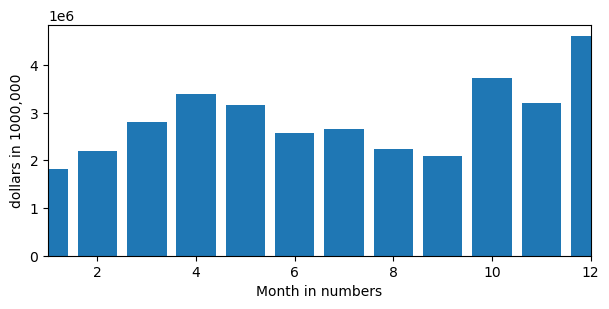

In [56]:
plt.figure(figsize=(7,3))
plt.xlim(1,12)
plt.bar(res.index,res.Sales)
plt.xlabel("Month in numbers")
plt.ylabel("dollars in 1000,000")

Sales per city

In [64]:
df["City"] = df["Purchase Address"].str.split(',',expand=True).iloc[:,1]

In [84]:
def get_state(addr):
    return addr.split(',')[2].strip()[:2]
df["State"] = df['Purchase Address'].apply(get_state)

In [101]:
df.groupby("City").sum().sort_values('Sales').Sales

C:\Users\dylan\AppData\Local\Temp\ipykernel_9620\850207840.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("City").sum().sort_values('Sales').Sales


City
 Austin           1819581.75
 Portland         2320490.61
 Seattle          2747755.48
 Dallas           2767975.40
 Atlanta          2795498.58
 Boston           3661642.01
 New York City    4664317.43
 Los Angeles      5452570.80
 San Francisco    8262203.91
Name: Sales, dtype: float64

In [94]:
df["ct_st"] = df['City']+"("+df["State"]+")"

In [97]:
gdf = df.groupby('ct_st').sum().Sales

C:\Users\dylan\AppData\Local\Temp\ipykernel_9620\3803513319.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf = df.groupby('ct_st').sum().Sales


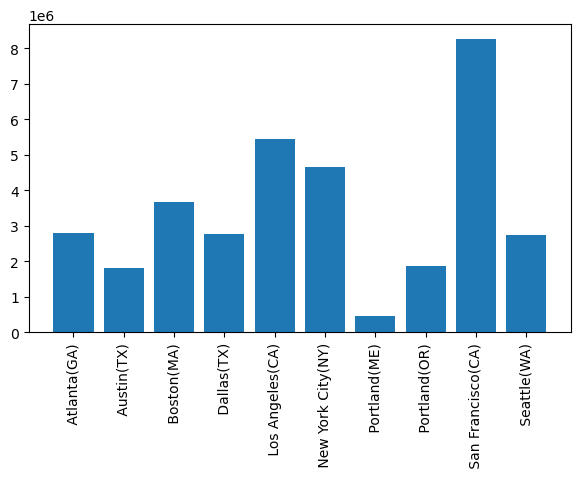

In [104]:
x = gdf.index
y=gdf.values
plt.figure(figsize=(7,4))
plt.bar(x,y)
plt.xticks(x,rotation=90)
plt.show()

Right time to market data

In [128]:
df["Hour"] = df['Order Date'].dt.hour
df['minute'] = df['Order Date'].dt.minute

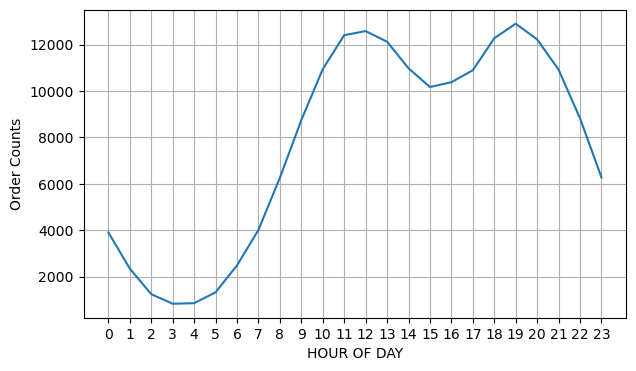

In [141]:
gdf = df.groupby('Hour').count().Sales

plt.figure(figsize=(7,4))
plt.plot(gdf.index,gdf.values)
plt.grid()
plt.xticks(gdf.index)
plt.xlabel("HOUR OF DAY")
plt.ylabel("Order Counts")
plt.show()

In [147]:
gdf = df[df["Order ID"].duplicated(False)]
gdf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month,City,State,ct_st,Hour,minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,CA,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,CA,Los Angeles(CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Los Angeles,CA,Los Angeles(CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Los Angeles,CA,Los Angeles(CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Boston,MA,Boston(MA),11,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186437,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",3.84,9,Atlanta,GA,Atlanta(GA),20,18
186448,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",11.99,9,Atlanta,GA,Atlanta(GA),0,25
186449,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",5.98,9,Atlanta,GA,Atlanta(GA),0,25
186486,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",600.00,9,San Francisco,CA,San Francisco(CA),13,49


In [149]:
gdf["Grouped"] = gdf.groupby("Order ID")["Product"].transform(lambda x:",".join(x))

C:\Users\dylan\AppData\Local\Temp\ipykernel_9620\306567923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf["Grouped"] = gdf.groupby("Order ID")["Product"].transform(lambda x:",".join(x))


In [157]:
kdf = gdf[["Order ID","Grouped"]].drop_duplicates()

In [159]:
from collections import Counter
from itertools import combinations

In [173]:
lis = Counter()
for val in kdf['Grouped']:
    row_list = val.split(",")
    lis.update(Counter(combinations(row_list,2)))

In [176]:
lis.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]